In [240]:
import matplotlib.pyplot as plt
from keras.layers import Dense
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [241]:
# Job Classification Data from Kaggle

data_set = pd.read_csv('jobclassinfo2.csv')
data_set

,ID,JobFamily,JobFamilyDescription,JobClass,JobClassDescription,PayGrade,EducationLevel,Experience,OrgImpact,ProblemSolving,Supervision,ContactLevel,FinancialBudget,PG
0,1,1,Accounting And Finance,1,Accountant I,5,3,1,3,3,4,3,5,PG05
1,2,1,Accounting And Finance,2,Accountant II,6,4,1,5,4,5,7,7,PG06
2,3,1,Accounting And Finance,3,Accountant III,8,4,2,6,5,6,7,10,PG08
3,4,1,Accounting And Finance,4,Accountant IV,10,5,5,6,6,7,8,11,PG10
4,5,2,Administrative Support,5,Admin Support I,1,1,0,1,1,1,1,1,PG01
5,6,2,Administrative Support,6,Admin Support II,2,1,1,1,1,1,2,3,PG02
6,7,2,Administrative Support,7,Admin Support III,3,1,2,1,2,1,3,3,PG03
7,8,2,Administrative Support,8,Administrative Support IV,4,4,0,1,2,1,3,5,PG04
8,9,2,Administrative Support,9,Administrative Support V,5,4,0,4,3,5,7,7,PG05
9,10,3,Baker,10,Baker I,4,2,0,1,4,1,1,2,PG04


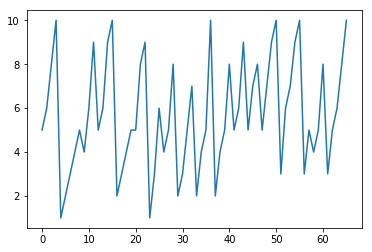

In [242]:
data_set['PayGrade'].plot()

In [243]:
# Clearing and Preprocess the Data

In [244]:
def clear_preprocess(dataset):
    data_preprocessed = dataset
    data_preprocessed.coloumns = ['ID','JobFamily','JobFamilyDescription','JobClass','JobClassDescription','PayGrade','EducationLevel','Experience','OrgImpact','ProblemSolving','Supervision','ContactLevel','FinancialBudget','PG']
    #converting categorical values to continious values
    Categorical_Coloumns = ['JobFamilyDescription','JobClassDescription','PG']
    for coloums in Categorical_Coloumns:
        encoder = LabelEncoder()
        encoder.fit(data_preprocessed[coloums])
        data_preprocessed[coloums] = encoder.transform(data_preprocessed[coloums])
    return data_preprocessed    

In [245]:
def remove_feautures(dataset,n_components):
    data_set = dataset 
    #removing the ID feauture not useful in classificarion
    data_set = data_set.drop('ID',axis=1)
    classes = data_set['PayGrade']
    data_set = data_set.drop('PayGrade',axis=1)
#     pca = PCA(n_components)
#     pca.fit(data_set)
#     data = pca.fit_transform(data_set)
    print 
    return [data_set,classes]

In [246]:
#This function converts the Categorial coloumns of the Dataset and preprocess  
dataset = clear_preprocess(data_set)
data_set,classes = remove_feautures(dataset,6)
print data_set


    JobFamily  JobFamilyDescription  JobClass  JobClassDescription  \
0           1                     0         1                    0   
1           1                     0         2                    1   
2           1                     0         3                    2   
3           1                     0         4                    3   
4           2                     1         5                    4   
5           2                     1         6                    5   
6           2                     1         7                    6   
7           2                     1         8                    7   
8           2                     1         9                    8   
9           3                     2        10                    9   
10          3                     2        11                   10   
11          3                     2        12                   11   
12          4                     3        13                   22   
13          4      

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


## Since there are 14 features in the dataset . We need to remove some features and try to fit   the Model 

### 14 feautres are very large for a bayesian classifier to deal with

### if it doesnt works out well we will try with random forest classifier


In [247]:
#Splitting the Training and testing data
from sklearn import svm
# data_set.shape

train = int(len(data_set)*0.80)
train_X,train_y = data_set.values[:train,:],classes.values[:train]
test_X ,test_y = data_set.values[train:,:],classes.values[train:] 

<bound method RandomForestClassifier.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

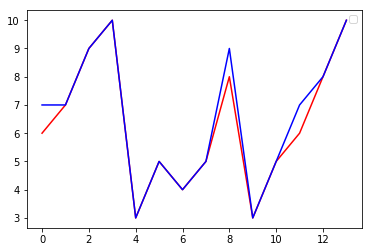

In [248]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(train_X,train_y)
predic = clf.predict(X=test_X)
plt.plot(test_y,"r")
plt.plot(predic,"b")
plt.legend()
clf.get_params

In [249]:
print classification_report(test_y,predic)


             precision    recall  f1-score   support

          3       1.00      1.00      1.00         2
          4       1.00      1.00      1.00         1
          5       1.00      1.00      1.00         3
          6       0.00      0.00      0.00         2
          7       0.33      1.00      0.50         1
          8       1.00      0.50      0.67         2
          9       0.50      1.00      0.67         1
         10       1.00      1.00      1.00         2

avg / total       0.77      0.79      0.75        14

